# Pandas tips and tricks
Author: Siraj Shabbir  
Date: 21/9/2023  
Email: sirajshabbir321@gmail.com

In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns

### 1. Check the version of pandas



In [2]:
pd.__version__

'2.0.3'

In [3]:
# another way
pd.show_versions()

e:\Conda\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



INSTALLED VERSIONS
------------------
commit           : 0f437949513225922d851e9581723d82120684a6
python           : 3.11.4.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19045
machine          : AMD64
processor        : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_United States.1252

pandas           : 2.0.3
numpy            : 1.25.2
pytz             : 2022.7
dateutil         : 2.8.2
setuptools       : 67.8.0
pip              : 23.1.2
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.9.2
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 3.1.2
IPython          : 8.12.2
pandas_datareader: None
bs4              : 4.12.2
bottleneck       : 1.3.5
brotl

### 2. Make a DataFrame

In [4]:
# data frame from dictionary
dict = {'Name': ('Tom', 'nick', 'krish', 'jack'), 'Age': (20, 21, 19, 18)}
df = pd.DataFrame(dict)
df

,Name,Age
0,Tom,20
1,nick,21
2,krish,19
3,jack,18


In [5]:
# df using tuple of dictionries
tup = ({'Name': 'Tom', 'Age': 20},
       {'Name': 'nick', 'Age': 21},
       {'Name': 'krish', 'Age': 19},
       {'Name': 'jack', 'Age': 18})
df = pd.DataFrame(tup)
df

,Name,Age
0,Tom,20
1,nick,21
2,krish,19
3,jack,18


In [6]:
# using numpy array to create data frame
arr = np.array([[1, 2, 3], [4, 5, 6]])
df = pd.DataFrame(arr)
df

,0,1,2
0,1,2,3
1,4,5,6


In [7]:
# df with random values
df = pd.DataFrame(np.random.rand(4, 8), columns=list('abcdefgh'))
df

,a,b,c,d,e,f,g,h
0,0.778018,0.923247,0.170358,0.631098,0.816300,0.033525,0.849630,0.131598
1,0.309393,0.458952,0.642853,0.768830,0.667722,0.251657,0.603972,0.122562
2,0.524429,0.542116,0.385317,0.394027,0.838213,0.491745,0.740847,0.686711
3,0.818060,0.672475,0.212198,0.143771,0.868188,0.230681,0.288236,0.934066


### 3. Rename columns

In [8]:
df = pd.DataFrame({"col 1": [1, 2, 3, 4], "col 2": [5, 6, 7, 8]})
df

,col 1,col 2
0,1,5
1,2,6
2,3,7
3,4,8


In [9]:
df.rename(columns={'col 1': 'col_1', 'col 2': 'col_2'}, inplace=True)
# or df.columns = ['col_1', 'col_2']
# or df.columns = df.columns.str.replace(' ', '_')
# or df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
df

,col_1,col_2
0,1,5
1,2,6
2,3,7
3,4,8


In [10]:
# adding prefixes and suffixes to column names
df = df.add_prefix('X_')
df = df.add_suffix('_Y')
df

,X_col_1_Y,X_col_2_Y
0,1,5
1,2,6
2,3,7
3,4,8


### 4. Template Data

In [11]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
# summary of data frame
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [14]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [15]:
# saving data frame to csv file
df.to_csv('titanic.csv', index=False)

### 5. Using your own data

In [16]:
data = pd.read_csv('titanic.csv')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 6. Reverse the row order

In [17]:
df.loc[::-1].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True


In [18]:
df.loc[::-1].reset_index(drop=True).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
1,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
2,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
3,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
4,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True


### 7. Reverse the column order

In [19]:
df.loc[:, ::-1].head()

,alone,alive,embark_town,deck,adult_male,who,class,embarked,fare,parch,sibsp,age,sex,pclass,survived
0,False,no,Southampton,NaN,True,man,Third,S,7.2500,0,1,22.0,male,3,0
1,False,yes,Cherbourg,C,False,woman,First,C,71.2833,0,1,38.0,female,1,1
2,True,yes,Southampton,NaN,False,woman,Third,S,7.9250,0,0,26.0,female,3,1
3,False,yes,Southampton,C,False,woman,First,S,53.1000,0,1,35.0,female,1,1
4,True,no,Southampton,NaN,True,man,Third,S,8.0500,0,0,35.0,male,3,0


### 8. Select columns by data type

In [20]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [21]:
df.select_dtypes(include='category').head()

,class,deck
0,Third,NaN
1,First,C
2,Third,NaN
3,First,C
4,Third,NaN


### 9. Convert strings to numbers

In [22]:
df = pd.DataFrame({'col_1': ['1', '2', '3', '4'], 'col_2': ['5', '6', '7', '8']})
df.dtypes

col_1    object
col_2    object
dtype: object

In [23]:
df.astype({'col_1': 'int32', 'col_2': 'int32'}).dtypes
# or df.astype('int32')
# or df['col_1'] = df['col_1'].astype('int32'); df['col_2'] = df['col_2'].astype('int32')

col_1    int32
col_2    int32
dtype: object

In [24]:
# errors: raise: raises an error(default), coerce: replaces invalid parsing with NaN, ignore: invalid parsing will return the input 
pd.to_numeric(df['col_1'], errors='coerce', downcast='integer')

0    1
1    2
2    3
3    4
Name: col_1, dtype: int8

### 10. Reduce DataFrame size

In [25]:
df = sns.load_dataset('titanic')
df.shape

(891, 15)

In [26]:
# Passing memory_usage='deep' will enable a more accurate memory usage report,
# accounting for the full usage of the contained objects. 
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 313.7 KB


In [27]:
# 'verbose' specifies whether to print the full summary.
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 15 entries, survived to alone
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [28]:
# reucing data frame size
df.sample(frac=0.5).shape

(446, 15)

### 11. Copy Data to clipboard

In [29]:
# writting data to clipboard
df.to_clipboard(index=False)

In [30]:
# reading data from clipboard
df = pd.read_clipboard()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 12. Split a DataFrame into two  subsets

In [31]:
len(df)

891

In [32]:
df1 = df.sample(frac=0.50, random_state=1)
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
223,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
84,1,2,female,17.0,0,0,10.5000,S,Second,woman,False,NaN,Southampton,yes,True
680,0,3,female,NaN,0,0,8.1375,Q,Third,woman,False,NaN,Queenstown,no,True
535,1,2,female,7.0,0,2,26.2500,S,Second,child,False,NaN,Southampton,yes,False


In [33]:
df2 = df.drop(df1.index)
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
18,0,3,female,31.0,1,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False


In [34]:
len(df1), len(df2)

(446, 445)

### 13. Join two DataFrames

In [35]:
df = pd.concat((df1, df2))
df.shape

(891, 15)

### 14. Filtering a DataFrame

In [36]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [37]:
df[df.sex == 'male']

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
223,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
623,0,3,male,21.0,0,0,7.8542,S,Third,man,True,NaN,Southampton,no,True
148,0,2,male,36.5,0,2,26.0000,S,Second,man,True,F,Southampton,no,False
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False
794,0,3,male,25.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [38]:
df[df.sex.isin(['male'])].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
223,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
623,0,3,male,21.0,0,0,7.8542,S,Third,man,True,NaN,Southampton,no,True
148,0,2,male,36.5,0,2,26.0000,S,Second,man,True,F,Southampton,no,False
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False
794,0,3,male,25.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [39]:
# number of unique values in a column
df.pclass.nunique()

3

In [40]:
# five largest values of age column
df.age.nlargest(5)

630    80.0
851    74.0
493    71.0
96     71.0
116    70.5
Name: age, dtype: float64

In [41]:
# five smallest values of age column
df.age.nsmallest(5)

803    0.42
755    0.67
644    0.75
469    0.75
831    0.83
Name: age, dtype: float64

### 15. Filtering Large DataFrames

In [42]:
df['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [43]:
df.embark_town.value_counts(sort=True, dropna=False)

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: count, dtype: int64

In [44]:
df[df.embark_town.isin(df.embark_town.value_counts().nlargest(1).index)].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
223,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
84,1,2,female,17.0,0,0,10.5000,S,Second,woman,False,NaN,Southampton,yes,True
535,1,2,female,7.0,0,2,26.2500,S,Second,child,False,NaN,Southampton,yes,False
623,0,3,male,21.0,0,0,7.8542,S,Third,man,True,NaN,Southampton,no,True


### 16. Spliting a string into multiple columns

In [45]:
df = pd.DataFrame({
                    "name": ['Muhammad Mubashir', 'Wajahat Khan', 'Muhammad Ali'],
                    "location": ['Mirpur Pakistan', 'Karachi Pakistan', 'Lahore Pakistan'],
})

df

,name,location
0,Muhammad Mubashir,Mirpur Pakistan
1,Wajahat Khan,Karachi Pakistan
2,Muhammad Ali,Lahore Pakistan


In [46]:
# splitting a column into two columns
df[["first_name", "last_name"]] = df.name.str.split(' ', expand=True)
df

,name,location,first_name,last_name
0,Muhammad Mubashir,Mirpur Pakistan,Muhammad,Mubashir
1,Wajahat Khan,Karachi Pakistan,Wajahat,Khan
2,Muhammad Ali,Lahore Pakistan,Muhammad,Ali


In [47]:
df[["city", "country"]] = df.location.str.split(' ', expand=True)
df

,name,location,first_name,last_name,city,country
0,Muhammad Mubashir,Mirpur Pakistan,Muhammad,Mubashir,Mirpur,Pakistan
1,Wajahat Khan,Karachi Pakistan,Wajahat,Khan,Karachi,Pakistan
2,Muhammad Ali,Lahore Pakistan,Muhammad,Ali,Lahore,Pakistan


### 17. Aggregate by multiple functions

In [48]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [49]:
df.groupby(["who", "alive"])[["fare", "age"]].mean().T

who        child                   man                 woman           
alive         no        yes         no        yes         no        yes
fare   32.633703  32.891329  21.490736  42.076422  20.967174  54.813801
age     7.220588   5.778980  32.983871  34.069444  30.459184  32.446746

### 18. Select specific rows and columns

In [50]:
# select columns
df[['age', 'fare']].head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [51]:
df.describe()[3:]
# or df.describe().loc[['min', 'max', 'mean', '50%']]
# or df.describe().loc["min":"max"]
# or df.describe().iloc[3:]

,survived,pclass,age,sibsp,parch,fare
min,0.0,1.0,0.420,0.0,0.0,0.0000
25%,0.0,2.0,20.125,0.0,0.0,7.9104
50%,0.0,3.0,28.000,0.0,0.0,14.4542
75%,1.0,3.0,38.000,1.0,0.0,31.0000
max,1.0,3.0,80.000,8.0,6.0,512.3292


In [52]:
# selecting rows and columns
df.describe().loc["min":"max", "age":"fare"]

,age,sibsp,parch,fare
min,0.420,0.0,0.0,0.0000
25%,20.125,0.0,0.0,7.9104
50%,28.000,0.0,0.0,14.4542
75%,38.000,1.0,0.0,31.0000
max,80.000,8.0,6.0,512.3292


### 19. Reshape a MultiIndexed Series

In [53]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [54]:
s = df.groupby(["sex", "pclass"])[["survived"]].mean()
s

survived
sex    pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [55]:
s = s.unstack()
s

survived                    
pclass         1         2         3
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [56]:
s = s.stack()
s

survived
sex    pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*DYDOif_qBEgtWfFKUDSf0Q.png)

### 20. Continous to Categorical Data Conversion

In [57]:
df["new_age"] = pd.cut(df.age, bins=[0, 18, 25, 80], labels=["child", "young adult", "adult"]).head()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult


### 22. Convert set of values into anotherone

In [58]:
df["sex_new"] = df.sex.map({
    "male": 1,
    "female": 0
})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age,sex_new
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young adult,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,1


In [59]:
df.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [60]:
df["new_embarked"] = df.embarked.factorize()[0]
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_age,sex_new,new_embarked
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young adult,1,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,0,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,0,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,0,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,1,0
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,NaN,1,2
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,NaN,1,0
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,NaN,1,0
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,NaN,0,0
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,NaN,0,1


### 23. Transpose a wide DataFrame

In [61]:
df = pd.DataFrame(np.random.rand(10, 26), columns=list('abcdefghijklmnopqrstuvwxyz'))
df

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,0.366183,0.908890,0.606411,0.728260,0.572256,0.922670,0.998926,0.212729,0.312936,0.670829,...,0.320803,0.768722,0.943341,0.748986,0.245778,0.877985,0.224464,0.469168,0.107945,0.677742
1,0.495316,0.951500,0.635313,0.793163,0.977044,0.926581,0.851619,0.786260,0.893831,0.865942,...,0.860402,0.630433,0.527513,0.490067,0.975298,0.345039,0.007415,0.657443,0.852417,0.211897
2,0.156157,0.845183,0.166716,0.067194,0.235943,0.691882,0.451569,0.883865,0.395424,0.632806,...,0.586996,0.709874,0.553105,0.071812,0.488169,0.074996,0.365097,0.998043,0.021590,0.998994
3,0.654469,0.125109,0.257405,0.015120,0.310702,0.624157,0.241676,0.542494,0.172815,0.358329,...,0.355145,0.626778,0.234158,0.002477,0.350205,0.494982,0.843060,0.700622,0.890288,0.242440
4,0.838424,0.858111,0.787506,0.776397,0.224174,0.190104,0.777479,0.475529,0.864961,0.868848,...,0.321606,0.454908,0.296745,0.377493,0.866606,0.722571,0.571792,0.568873,0.722733,0.748422
5,0.738607,0.466682,0.423454,0.266497,0.779792,0.313582,0.382615,0.137019,0.647028,0.233295,...,0.139765,0.912102,0.069368,0.412551,0.489547,0.236661,0.553615,0.222613,0.514225,0.460749
6,0.216543,0.441016,0.198822,0.349190,0.219990,0.406696,0.138773,0.476341,0.657147,0.321159,...,0.906088,0.545571,0.525398,0.706233,0.234033,0.388922,0.599668,0.147040,0.031751,0.213651
7,0.031032,0.897949,0.965414,0.142922,0.658640,0.574103,0.200518,0.598976,0.676907,0.368781,...,0.437951,0.082549,0.864705,0.680811,0.397383,0.858430,0.989672,0.777678,0.114465,0.868184
8,0.078443,0.306312,0.931388,0.694717,0.458490,0.986116,0.826695,0.970929,0.541100,0.238178,...,0.711794,0.808710,0.979376,0.421220,0.383422,0.815992,0.714358,0.308935,0.583556,0.194634
9,0.941170,0.366159,0.423070,0.041419,0.596107,0.722243,0.010184,0.356339,0.024440,0.382781,...,0.426780,0.373677,0.326763,0.794379,0.356539,0.511705,0.438515,0.408842,0.682370,0.256876


In [62]:
df.T

,0,1,2,3,4,5,6,7,8,9
a,0.366183,0.495316,0.156157,0.654469,0.838424,0.738607,0.216543,0.031032,0.078443,0.941170
b,0.908890,0.951500,0.845183,0.125109,0.858111,0.466682,0.441016,0.897949,0.306312,0.366159
c,0.606411,0.635313,0.166716,0.257405,0.787506,0.423454,0.198822,0.965414,0.931388,0.423070
d,0.728260,0.793163,0.067194,0.015120,0.776397,0.266497,0.349190,0.142922,0.694717,0.041419
e,0.572256,0.977044,0.235943,0.310702,0.224174,0.779792,0.219990,0.658640,0.458490,0.596107
f,0.922670,0.926581,0.691882,0.624157,0.190104,0.313582,0.406696,0.574103,0.986116,0.722243
g,0.998926,0.851619,0.451569,0.241676,0.777479,0.382615,0.138773,0.200518,0.826695,0.010184
h,0.212729,0.786260,0.883865,0.542494,0.475529,0.137019,0.476341,0.598976,0.970929,0.356339
i,0.312936,0.893831,0.395424,0.172815,0.864961,0.647028,0.657147,0.676907,0.541100,0.024440
j,0.670829,0.865942,0.632806,0.358329,0.868848,0.233295,0.321159,0.368781,0.238178,0.382781


In [65]:
df = pd.DataFrame((["1234", 100, 300, 400], ["5678", 200, 400, 500], ["9012", 300, 500, 600], ["9333", 299, 890, 100]),
                  columns=["id", "a", "b", "c"])
df

,id,a,b,c
0,1234,100,300,400
1,5678,200,400,500
2,9012,300,500,600
3,9333,299,890,100


In [66]:
df.T

,0,1,2,3
id,1234,5678,9012,9333
a,100,200,300,299
b,300,400,500,890
c,400,500,600,100


In [72]:
df2 = df.melt(id_vars=["id"], value_vars=["a", "b", "c"], var_name="category", value_name="value")
df2

,id,category,value
0,1234,a,100
1,5678,a,200
2,9012,a,300
3,9333,a,299
4,1234,b,300
5,5678,b,400
6,9012,b,500
7,9333,b,890
8,1234,c,400
9,5678,c,500


<Axes: xlabel='id', ylabel='value'>

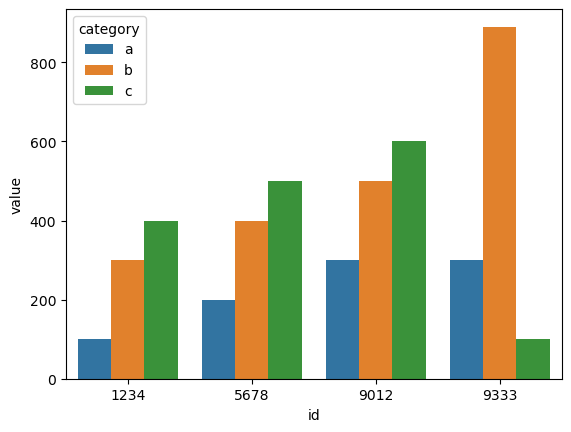

In [73]:
sns.barplot(x="id", y="value", hue="category", data=df2)